In [1]:
import torch
from utils import device # detects whether you are using CPU or GPU
import matplotlib.pyplot as plt
from cust_plot import plot_rewards, plot_success, plot_mu, plot_sig
import numpy as np

import glob, os

flist = glob.glob("./R02*99.pt")

reward = []
success = []
mu = []
sigma = []


n_av = 1000

for file in flist:
    print(file)
    tr_data = torch.load(file, map_location=device)
    reward_list = tr_data['rewards']
    success_list = tr_data['success']
    mu_list = tr_data['mu']
    mu_scale = abs(np.array(mu_list)).sum(axis=0)
    mu_list = mu_list / mu_scale
    sigma_list = tr_data['sig']
    sigma_list = sigma_list / mu_scale
    
    reward_mean = np.mean(reward_list[-n_av:])
    success_mean = np.mean(success_list[-n_av:])
    mu_mean = np.mean(mu_list[:][-n_av:],axis=1)
    sigma_mean = np.mean(sigma_list[:][-n_av:],axis=1)
    
    plt_data = tr_data

    reward.append(reward_mean)
    success.append(success_mean)
    mu.append(mu_mean)
    sigma.append(sigma_mean)

    

./R02_sl_ns_46_99.pt
./R02_sl_ns_147_99.pt
./R02_sl_ns_102_99.pt
./R02_sl_ns_86_99.pt
./R02_sl_ns_126_99.pt
./R02_sl_ns_62_99.pt
./R02_sl_ns_27_99.pt
./R02_sl_ns_119_99.pt
./R02_sl_ns_60_99.pt
./R02_sl_ns_25_99.pt
./R02_sl_ns_18_99.pt
./R02_sl_ns_161_99.pt
./R02_sl_ns_124_99.pt
./R02_sl_ns_84_99.pt
./R02_sl_ns_145_99.pt
./R02_sl_ns_100_99.pt
./R02_sl_ns_79_99.pt
./R02_sl_ns_44_99.pt
./R02_sl_ns_38_99.pt
./R02_sl_ns_80_99.pt
./R02_sl_ns_141_99.pt
./R02_sl_ns_104_99.pt
./R02_sl_ns_139_99.pt
./R02_sl_ns_40_99.pt
./R02_sl_ns_64_99.pt
./R02_sl_ns_21_99.pt
./R02_sl_ns_9_99.pt
./R02_sl_ns_158_99.pt
./R02_sl_ns_99_99.pt
./R02_sl_ns_120_99.pt
./R02_sl_ns_59_99.pt
./R02_sl_ns_122_99.pt
./R02_sl_ns_66_99.pt
./R02_sl_ns_23_99.pt
./R02_sl_ns_42_99.pt
./R02_sl_ns_143_99.pt
./R02_sl_ns_106_99.pt
./R02_sl_ns_82_99.pt
./R02_sl_ns_19_99.pt
./R02_sl_ns_125_99.pt
./R02_sl_ns_160_99.pt
./R02_sl_ns_118_99.pt
./R02_sl_ns_24_99.pt
./R02_sl_ns_61_99.pt
./R02_sl_ns_45_99.pt
./R02_sl_ns_85_99.pt
./R02_sl_ns_101_

In [2]:
#need stdev here across means of mus.
mu_very_mean = np.mean(mu,axis=0)
mu_loc_sigma = np.std(mu,axis=0)
sigma_very_mean = np.sqrt(np.mean(pow(np.array(sigma),2),axis=0))
print(mu_very_mean)
print(mu_loc_sigma)
print(sigma_very_mean)

[ 0.03573412  0.1825232   0.18011962 -0.02751875 -0.07754303  0.07339783
  0.11172009 -0.05046583  0.10593395  0.05739269 -0.02509604]
[0.02243739 0.03159581 0.0288616  0.02630891 0.02773198 0.02505628
 0.02407458 0.03263941 0.03249763 0.03479626 0.02647152]
[0.09999047 0.10371272 0.10513237 0.10328273 0.10299495 0.10256799
 0.10114779 0.10537938 0.10214451 0.10305213 0.10516703]


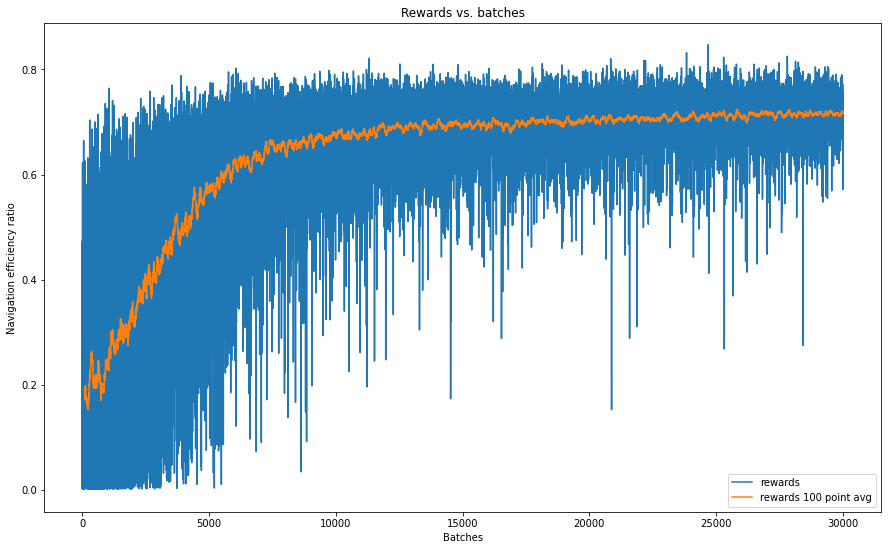

In [3]:
fig, ax = plt.subplots(figsize=(15,9))
plot_rewards(ax=ax, plt_data=plt_data, plt_avg=100)

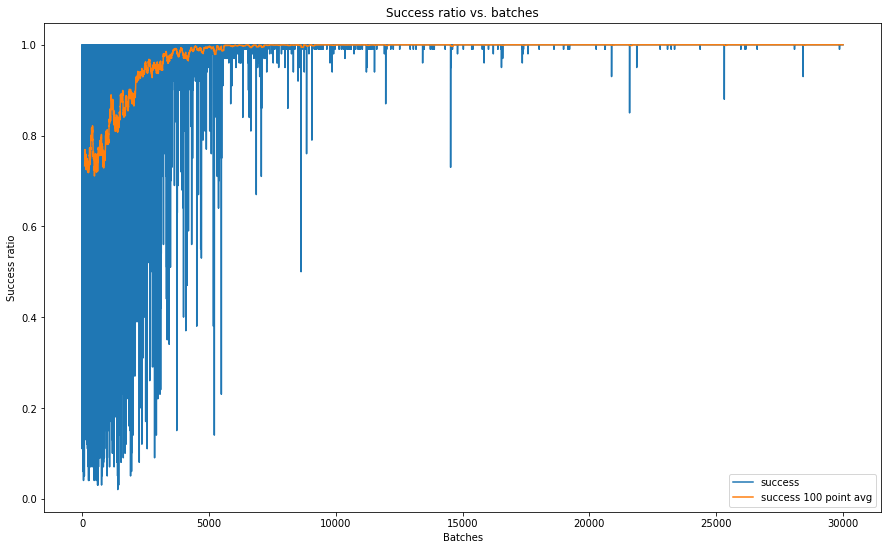

In [4]:
fig, ax = plt.subplots(figsize=(15,9))
plot_success(ax=ax, plt_data=plt_data, plt_avg=100)

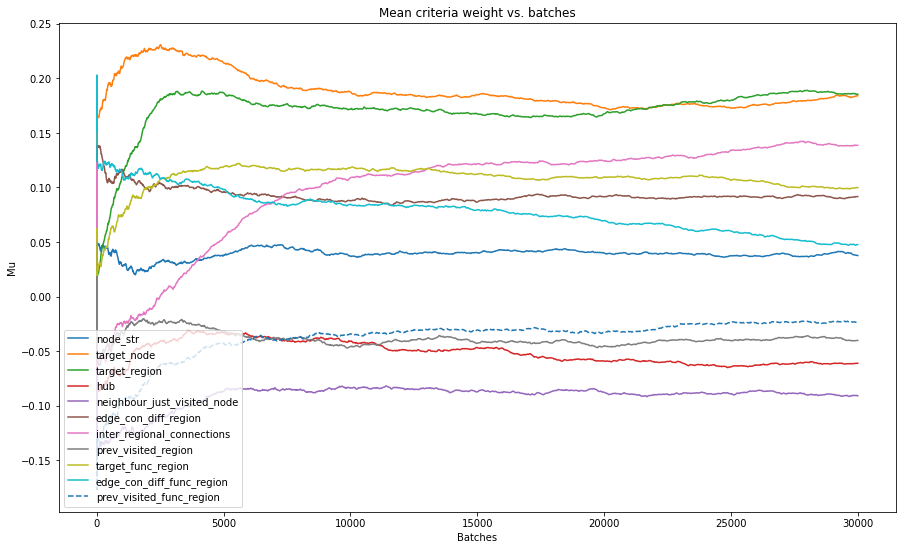

In [5]:
fig, ax = plt.subplots(figsize=(15,9))
plot_mu(ax=ax, plt_data=plt_data)

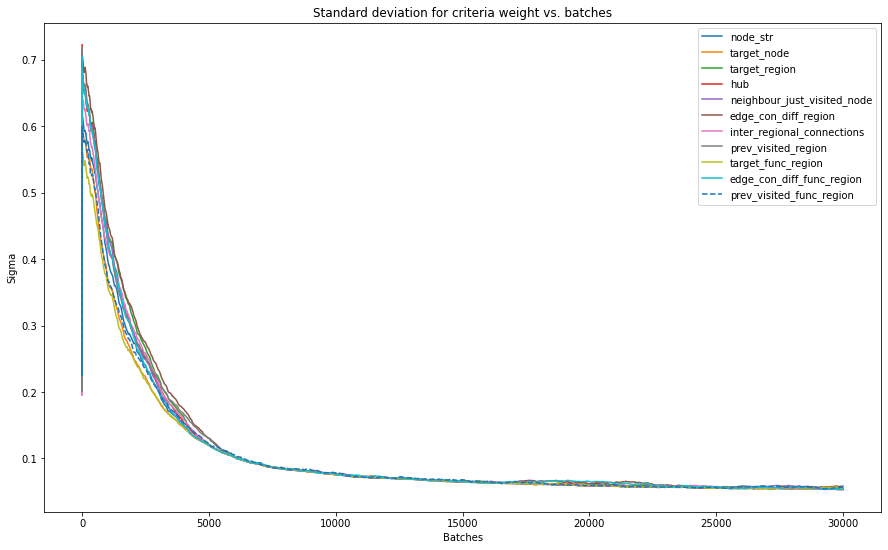

In [6]:
fig, ax = plt.subplots(figsize=(15,9))
plot_sig(ax=ax, plt_data=plt_data)